In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive
from os import path
import os
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install fbprophet
!pip install statsmodels

In [ ]:
import fbprophet
import pandas as pd
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [ ]:
from pandas import read_csv
# load data
path = 'gdrive/My Drive/Colab Notebooks/waterlevel.csv'
df = read_csv(path, header=0)
# summarize shape
#df = df.iloc[1: , :]
print(df.shape)

print(df)

(39, 2)
          date  water level
0   17-06-2016      377.083
1   13-03-2019      377.839
2   09-04-2019      378.170
3   06-05-2019      378.363
4   02-06-2019      378.063
5   29-06-2019      376.730
6   26-07-2019      378.722
7   22-08-2019      379.044
8   18-09-2019      379.601
9   15-10-2019      379.362
10  11-11-2019      380.123
11  08-12-2019      379.126
12  04-01-2020      378.029
13  31-01-2020      376.427
14  27-02-2020      375.793
15  25-03-2020      378.326
16  21-04-2020      378.045
17  18-05-2020      377.646
18  14-06-2020      375.314
19  11-07-2020      377.049
20  07-08-2020      380.886
21  03-09-2020      380.647
22  30-09-2020      380.071
23  27-10-2020      379.635
24  23-11-2020      378.390
25  20-12-2020      378.675
26  16-01-2021      379.254
27  12-02-2021      378.053
28  11-03-2021      376.375
29  07-04-2021      377.629
30  04-05-2021      377.736
31  31-05-2021      375.378
32  27-06-2021      379.106
33  24-07-2021      379.665
34  20-08-20

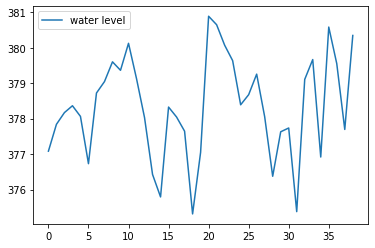

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [ ]:

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
df

,ds,y
0,2016-06-17,377.083
1,2019-03-13,377.839
2,2019-09-04,378.170
3,2019-06-05,378.363
4,2019-02-06,378.063
5,2019-06-29,376.730
6,2019-07-26,378.722
7,2019-08-22,379.044
8,2019-09-18,379.601
9,2019-10-15,379.362


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


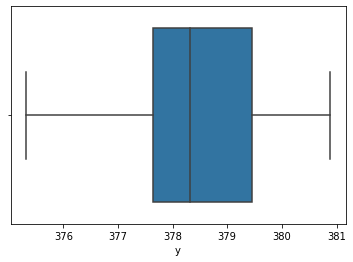

In [ ]:
import seaborn as sns
sns.boxplot(df['y'])
import numpy as np

Q1 = np.percentile(df['y'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['y'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


# Upper bound
upper = np.where(df['y'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['y'] <= (Q1-1.5*IQR))

In [ ]:
from fbprophet import Prophet
# define the model

model = Prophet()
# fit the model
model.fit(df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2022-01-01  380.606493  379.578300  381.610239
1 2022-02-01  380.450551  379.420678  381.514046
2 2022-03-01  377.483964  376.431093  378.594450
3 2022-04-01  374.398464  373.352613  375.573228


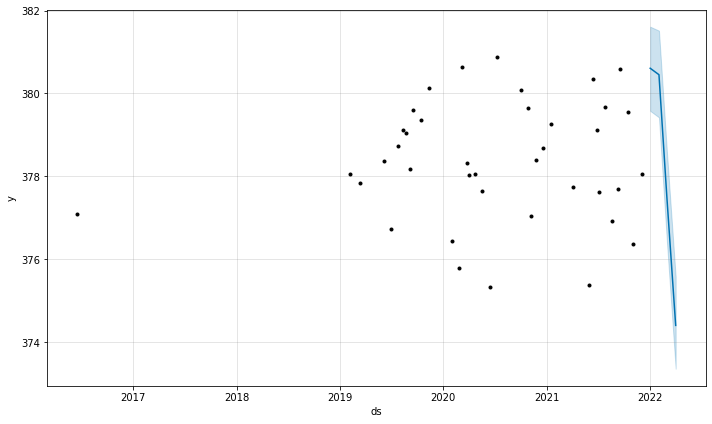

In [ ]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

# define the period for which we want a prediction
future = list()
for i in range(1, 5):
	date = '2022-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

          ds        yhat  yhat_lower  yhat_upper
0 2019-01-01  383.844399  382.763235  384.867113
1 2019-02-01  376.139388  375.070298  377.213985
2 2019-03-01  373.276413  372.212537  374.450050
3 2019-04-01  377.977029  376.937049  378.973204
4 2019-05-01  378.810234  377.796804  379.803001


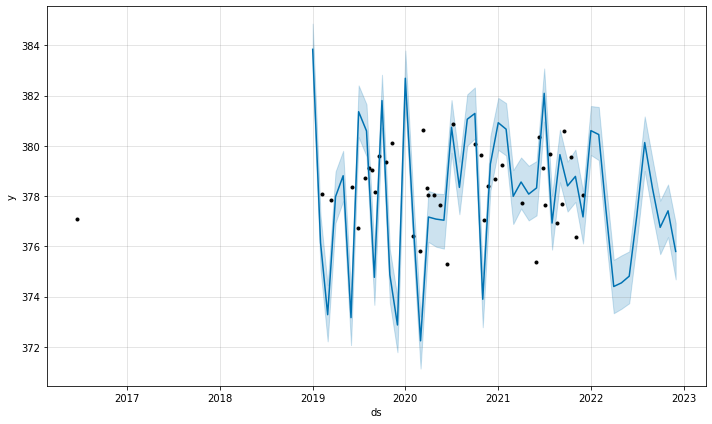

In [ ]:
# define the period for which we want a prediction
future = list()
for i in range(2019,2023):
  for j in range(1, 13):
    date = '%04d-%02d' % (i,j)
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
train = df.drop(df.index[-72:-60])
print(train.tail())

           ds        y
34 2021-08-20  376.918
35 2021-09-16  380.581
36 2021-10-13  379.550
37 2021-09-11  377.695
38 2021-06-12  380.344


RMSE: 1.241
MAE: 0.863


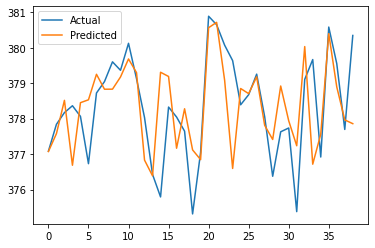

In [ ]:
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

future = list()
for i in df['ds'][:]:
  future.append(i)
'''for i in range(2018,2021):
  for j in range(1, 13):
    date = '%04d-%02d' % (i,j)
    future.append([date])'''
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)


y_true = df['y'][:].values
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true, y_pred, squared=False)
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

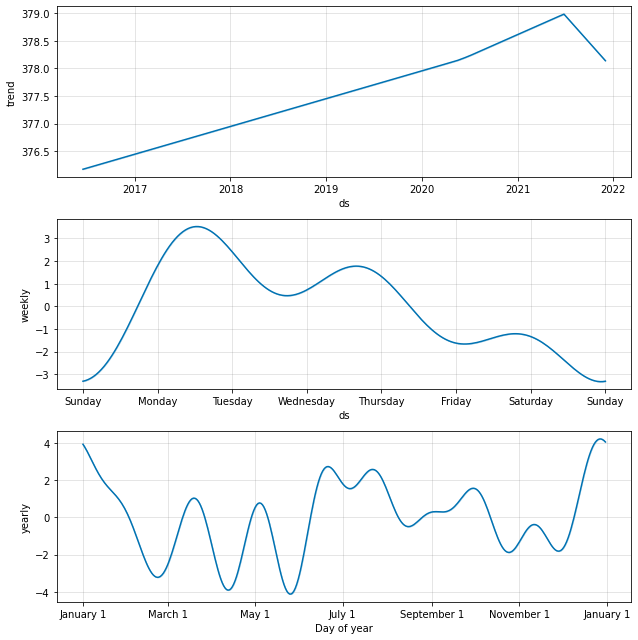

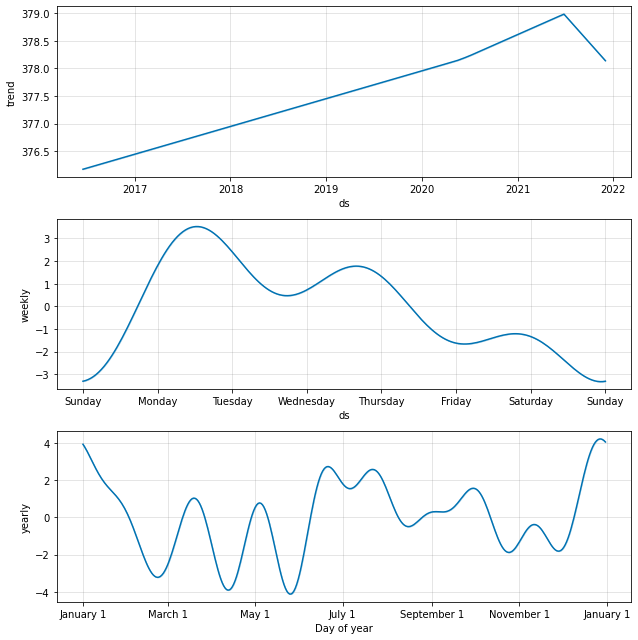

In [ ]:
model.plot_components(forecast)